In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import os

In [2]:
input_file = 'D:/Calvin/Documents/GTOMSA/Applied Analytics Practicum - CSE 6748/final_data/social_data_final.csv'


def load_dataset(file_path):
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        print(f"Dataset '{file_path}' loaded successfully.\n")
        return df
    else:
        raise FileNotFoundError(f"The file '{file_path}' does not exist. Please check the file path.")

# Load the dataset
df = load_dataset(input_file)


Dataset 'D:/Calvin/Documents/GTOMSA/Applied Analytics Practicum - CSE 6748/final_data/social_data_final.csv' loaded successfully.



In [3]:
# Display the first five rows of the dataset
print("First five rows of the dataset:")
display(df.head())


First five rows of the dataset:


,sustainer,gender,client_state_rank,all_state_rank,client_zip_rank,all_zip_rank,age,account_id,gift_date,gift_min_t12m,...,drtv_t12m,other_t12m,no_channel_t12m,member_t12m,gift_min_lt,gift_max_lt,gift_avg_lt,gift_count_lt,promo_count_lt,cons_month_lt
0,0,0,38,36,23318,33778,NaN,8-21128286,2020-05-15,0.02,...,0,0,0,0,0.02,0.02,0.02,1,1,1
1,0,0,50,50,20513,29778,NaN,8-20554933,2019-02-26,1.50,...,0,1,0,0,1.50,1.50,1.50,1,0,1
2,0,0,50,50,20513,29778,NaN,8-20554933,2019-07-30,1.00,...,0,1,0,0,1.00,1.50,1.30,5,0,2
3,0,0,50,50,20513,29778,NaN,8-20554933,2019-06-14,1.00,...,0,1,0,0,1.00,1.50,1.33,3,0,1
4,0,0,50,50,20513,29778,NaN,8-20554933,2019-07-19,1.00,...,0,1,0,0,1.00,1.50,1.38,4,0,2


In [ ]:
# Define the list of columns you want to drop
columns_to_drop = ['all_state_rank','all_zip_rank','no_channel_t12m','member_t12m','age','gift_date','account_id']

#dropped because 67.5% of age is missing, safer to just remove this feature
# no_channel and member removed as they all have only 1 value

print(f"Columns intended to drop: {columns_to_drop}\n")

existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

if existing_columns_to_drop:
    print(f"Columns to be dropped (exist in DataFrame): {existing_columns_to_drop}\n")
else:
    print("No specified columns found in the DataFrame to drop.\n")
df = df.drop(columns=existing_columns_to_drop)
print(f"Successfully dropped columns: {existing_columns_to_drop}\n")

print("Remaining columns after dropping:")
print(df.columns.tolist())


Columns intended to drop: ['all_state_rank', 'all_zip_rank', 'no_channel_t12m', 'member_t12m', 'age', 'gift_date', 'account_id']

Columns to be dropped (exist in DataFrame): ['all_state_rank', 'all_zip_rank', 'no_channel_t12m', 'member_t12m', 'age', 'gift_date', 'account_id']

Successfully dropped columns: ['all_state_rank', 'all_zip_rank', 'no_channel_t12m', 'member_t12m', 'age', 'gift_date', 'account_id']

Remaining columns after dropping:
['sustainer', 'gender', 'client_state_rank', 'client_zip_rank', 'gift_min_t12m', 'gift_max_t12m', 'gift_avg_t12m', 'gift_count_t12m', 'promo_count_t12m', 'cons_month_t12m', 'dm_t12m', 'tm_t12m', 'wm_t12m', 'digital_t12m', 'f2f_t12m', 'events_t12m', 'drtv_t12m', 'other_t12m', 'gift_min_lt', 'gift_max_lt', 'gift_avg_lt', 'gift_count_lt', 'promo_count_lt', 'cons_month_lt']


In [ ]:

def handle_missing_values(df, strategy='fill', fill_value=0):
    if strategy == 'fill':
        df_filled = df.fillna(fill_value)
        print(f"Missing values filled with {fill_value}.\n")
        return df_filled
    elif strategy == 'drop':
        df_dropped = df.dropna()
        print("Rows with missing values have been dropped.\n")
        return df_dropped
    else:
        raise ValueError("Unsupported strategy for handling missing values.")

# Handle missing values by filling with -1
df = handle_missing_values(df, strategy='fill', fill_value=-1)

Missing values filled with 0.



In [6]:
#remove_flags = ['dm_t12m','tm_t12m','wm_t12m','digital_t12m','f2f_t12m','events_t12m','drtv_t12m','other_t12m','no_channel_t12m','member_t12m','age','sustainer']
remove_flags = ['dm_t12m','tm_t12m','wm_t12m','digital_t12m','f2f_t12m','events_t12m','drtv_t12m','other_t12m','sustainer']
numerical_columns = df.select_dtypes(include=[np.number]).drop(columns=remove_flags).columns
print("Numerical columns:", numerical_columns.tolist())

Numerical columns: ['gender', 'client_state_rank', 'client_zip_rank', 'gift_min_t12m', 'gift_max_t12m', 'gift_avg_t12m', 'gift_count_t12m', 'promo_count_t12m', 'cons_month_t12m', 'gift_min_lt', 'gift_max_lt', 'gift_avg_lt', 'gift_count_lt', 'promo_count_lt', 'cons_month_lt']


Plotting histograms for numerical columns...



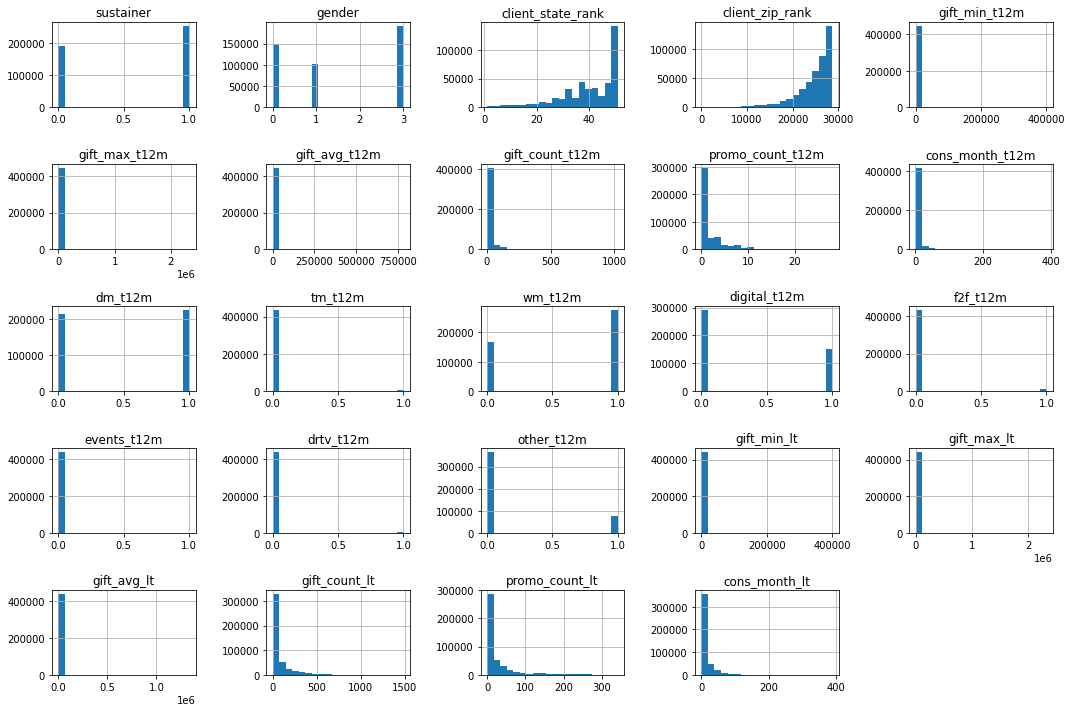

In [7]:
def plot_histograms(df, bins=20, figsize=(15, 10)):
    print("Plotting histograms for numerical columns...\n")
    df.hist(bins=bins, figsize=figsize)
    plt.tight_layout()
    plt.show()

# Plot histograms
plot_histograms(df)


Detecting Outliers We'll detect outliers using two methods:

Z-Score Method, Interquartile Range (IQR) Method

In [8]:
# Function to detect outliers using Z-Score
def detect_outliers_zscore(df, numerical_columns, threshold=3):
    outliers = {}
    print("Detecting outliers using Z-Score method\n")
    for column in numerical_columns:
        if df[column].nunique() > 1:
            z_scores = np.abs(stats.zscore(df[column]))
            outliers_indices = np.where(z_scores > threshold)[0]
            outliers[column] = outliers_indices
            print(f"Z-Score Outliers in '{column}': {len(outliers_indices)} detected")
        else:
            outliers[column] = np.array([])
            print(f"Z-Score Outliers in '{column}': 0 detected (constant column)")
    print("\n")
    return outliers

# Detect outliers using Z-Score
outliers_zscore = detect_outliers_zscore(df, numerical_columns)


Detecting outliers using Z-Score method

Z-Score Outliers in 'gender': 0 detected
Z-Score Outliers in 'client_state_rank': 4325 detected
Z-Score Outliers in 'client_zip_rank': 9159 detected
Z-Score Outliers in 'gift_min_t12m': 485 detected
Z-Score Outliers in 'gift_max_t12m': 282 detected
Z-Score Outliers in 'gift_avg_t12m': 405 detected
Z-Score Outliers in 'gift_count_t12m': 4400 detected
Z-Score Outliers in 'promo_count_t12m': 10283 detected
Z-Score Outliers in 'cons_month_t12m': 8874 detected
Z-Score Outliers in 'gift_min_lt': 271 detected
Z-Score Outliers in 'gift_max_lt': 626 detected
Z-Score Outliers in 'gift_avg_lt': 205 detected
Z-Score Outliers in 'gift_count_lt': 9687 detected
Z-Score Outliers in 'promo_count_lt': 13632 detected
Z-Score Outliers in 'cons_month_lt': 7976 detected




In [9]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, numerical_columns):
    outliers = {}
    print("Detecting outliers using IQR method...\n")
    for column in numerical_columns:
        Q1 = df[column].quantile(0.10)
        Q3 = df[column].quantile(0.90)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        condition = (df[column] < lower_bound) | (df[column] > upper_bound)
        outliers_indices = df[condition].index
        outliers[column] = outliers_indices
        print(f"IQR Outliers in '{column}': {len(outliers_indices)} detected")
    print("\n")
    return outliers

# Detect outliers using IQR
outliers_iqr = detect_outliers_iqr(df, numerical_columns)

Detecting outliers using IQR method...

IQR Outliers in 'gender': 0 detected
IQR Outliers in 'client_state_rank': 0 detected
IQR Outliers in 'client_zip_rank': 0 detected
IQR Outliers in 'gift_min_t12m': 13730 detected
IQR Outliers in 'gift_max_t12m': 12309 detected
IQR Outliers in 'gift_avg_t12m': 8968 detected
IQR Outliers in 'gift_count_t12m': 3830 detected
IQR Outliers in 'promo_count_t12m': 683 detected
IQR Outliers in 'cons_month_t12m': 9762 detected
IQR Outliers in 'gift_min_lt': 9253 detected
IQR Outliers in 'gift_max_lt': 8892 detected
IQR Outliers in 'gift_avg_lt': 10141 detected
IQR Outliers in 'gift_count_lt': 1311 detected
IQR Outliers in 'promo_count_lt': 86 detected
IQR Outliers in 'cons_month_lt': 2780 detected




Removing Outliers Based on IQR We'll remove the detected outliers using the IQR method to obtain a dataset without outliers

In [10]:
def remove_outliers_iqr(df, numerical_columns):
    print("Removing outliers based on IQR method...\n")
    Q1 = df[numerical_columns].quantile(0.10)
    Q3 = df[numerical_columns].quantile(0.90)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    condition = ~((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).any(axis=1)
    df_no_outliers = df[condition]
    print("Outliers removed.")
    print(f"Original dataset size: {df.shape[0]} rows")
    print(f"Dataset without outliers size: {df_no_outliers.shape[0]} rows\n")
    return df_no_outliers

# Remove outliers using IQR
df_without_outliers = remove_outliers_iqr(df, numerical_columns)


Removing outliers based on IQR method...

Outliers removed.
Original dataset size: 441846 rows
Dataset without outliers size: 401775 rows



In [11]:

def display_dataset_without_outliers(df):
    print("Displaying the dataset without outliers:\n")
    # Display the first 5 rows
    print("First five rows of the dataset without outliers:")
    display(df.head())
    
    print("\nSummary Statistics of Dataset Without Outliers:")
    display(df.describe())
    
    # Display the number of rows and columns
    print(f"\nDataset without outliers contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

display_dataset_without_outliers(df_without_outliers)


Displaying the dataset without outliers:

First five rows of the dataset without outliers:


,sustainer,gender,client_state_rank,client_zip_rank,gift_min_t12m,gift_max_t12m,gift_avg_t12m,gift_count_t12m,promo_count_t12m,cons_month_t12m,...,f2f_t12m,events_t12m,drtv_t12m,other_t12m,gift_min_lt,gift_max_lt,gift_avg_lt,gift_count_lt,promo_count_lt,cons_month_lt
0,0,0,38,23318,0.02,0.02,0.02,1,1,1,...,0,0,0,0,0.02,0.02,0.02,1,1,1
1,0,0,50,20513,1.50,1.50,1.50,1,0,1,...,0,0,0,1,1.50,1.50,1.50,1,0,1
2,0,0,50,20513,1.00,1.50,1.30,5,0,2,...,0,0,0,1,1.00,1.50,1.30,5,0,2
3,0,0,50,20513,1.00,1.50,1.33,3,0,1,...,0,0,0,1,1.00,1.50,1.33,3,0,1
4,0,0,50,20513,1.00,1.50,1.38,4,0,2,...,0,0,0,1,1.00,1.50,1.38,4,0,2



Summary Statistics of Dataset Without Outliers:


,sustainer,gender,client_state_rank,client_zip_rank,gift_min_t12m,gift_max_t12m,gift_avg_t12m,gift_count_t12m,promo_count_t12m,cons_month_t12m,...,f2f_t12m,events_t12m,drtv_t12m,other_t12m,gift_min_lt,gift_max_lt,gift_avg_lt,gift_count_lt,promo_count_lt,cons_month_lt
count,401775.000000,401775.000000,401775.000000,401775.000000,401775.000000,401775.000000,401775.000000,401775.000000,401775.000000,401775.000000,...,401775.000000,401775.000000,401775.000000,401775.000000,401775.000000,401775.000000,401775.000000,401775.000000,401775.000000,401775.000000
mean,0.561553,1.498886,39.559826,24476.874781,42.961445,75.838158,54.905354,13.157715,1.820860,3.990858,...,0.023112,0.001879,0.010312,0.166777,24.381649,120.723907,46.674093,60.613921,26.479420,10.060673
std,0.496197,1.337002,10.995274,4294.317891,48.155377,94.202331,58.675131,26.343409,2.744022,6.821925,...,0.150261,0.043309,0.101022,0.372777,27.465612,164.029115,45.830203,100.644051,48.261064,15.784187
min,0.000000,0.000000,1.000000,15.000000,0.000000,0.020000,0.020000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.020000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,33.000000,22870.000000,15.000000,25.000000,20.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,10.000000,30.000000,20.000000,2.000000,1.000000,1.000000
50%,1.000000,1.000000,43.000000,25821.000000,25.000000,50.000000,31.550000,3.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,15.000000,66.491248,30.000000,18.000000,6.000000,2.000000
75%,1.000000,3.000000,49.000000,27560.000000,50.000000,100.000000,69.250000,11.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,25.000000,125.000000,55.250000,70.000000,29.000000,13.000000
max,1.000000,3.000000,51.000000,28674.000000,389.350006,950.000000,612.210000,169.000000,24.000000,49.000000,...,1.000000,1.000000,1.000000,1.000000,205.000000,1871.000000,465.290000,797.000000,316.000000,137.000000



Dataset without outliers contains 401775 rows and 24 columns.



In [12]:
def save_dataset_without_outliers(df, output_path):
    try:
        df.to_csv(output_path, index=False)
        print(f"Dataset without outliers saved to '{output_path}'.\n")
    except Exception as e:
        print(f"Error saving file: {e}\n")


output_file = 'D:/Calvin/Documents/GTOMSA/Applied Analytics Practicum - CSE 6748/final_data/socialdata_without_outliers.csv'

# Save the cleaned dataset
save_dataset_without_outliers(df_without_outliers, output_file)


Dataset without outliers saved to 'D:/Calvin/Documents/GTOMSA/Applied Analytics Practicum - CSE 6748/final_data/socialdata_without_outliers.csv'.

